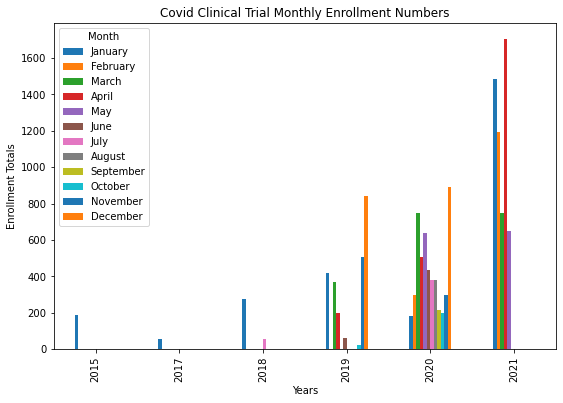

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV (load date data as proper date types)
covid = "~/Desktop/clinical-trial_data.csv"
covid_df = pd.read_csv(covid)
covid_df["Start Date"] = pd.to_datetime(covid_df["Start Date"])


# Sort the DF from oldest to most recent recordings
covid_df.sort_values(by="Start Date", inplace=True)

# Use the column of dates as the DF's index
covid_df.set_index(["Start Date"], inplace=True)

# Remove possible outliers (i.e, top and bottom 2.5 percentiles)
covid_df = covid_df[
    (covid_df["Enrollment"] > covid_df["Enrollment"].quantile(0.025)) &
    (covid_df["Enrollment"] < covid_df["Enrollment"].quantile(0.975))
]

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

# Create a column that has the year of each date recording
covid_df["Year"] = covid_df.index.year

# Create a column that has the month (1-12) of each date recording
covid_df["Month"] = covid_df.index.month

# Map the month integers to their proper names
covid_df["Month"] = covid_df["Month"].apply(
    lambda data: months[data-1]
)
# Make this a categorical column so it can be sorted by the order of values\
# in the `months` list, i.e., the proper month order
covid_df["Month"] = pd.Categorical(covid_df["Month"], categories=months)

# Pivot the DF so that there's a column for each month, each row\
# represents a year, and the cells have the mean page views for the\

# respective year and month
covid_df_pivot = pd.pivot_table(
    covid_df,
    values="Enrollment",
    index="Year",
    columns="Month",
    aggfunc=np.mean
)
# Plot a bar chart using the DF
ax = covid_df_pivot.plot(kind="bar")

# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()

# Change the plot dimensions (width, height)
fig.set_size_inches(9, 6)

# Change the axes labels
plt.title("Covid Clinical Trial Monthly Enrollment Numbers")
ax.set_xlabel("Years")
ax.set_ylabel("Enrollment Totals")

# Use this to show the plot in a new window
# plt.show()

# Export the plot as a PNG file
fig.savefig("covid_enrollment.png")